## Exploratory data analysis (EDA) with Pandas

### By:
Jose R. Zapata

### Date:
2024-10-24

### Description:

Exploratory data analysis (EDA) and description of the data set.

Data manipulation and visualization with Pandas


## 📚 Import  libraries

In [62]:
# base libraries for data science
import sys
from pathlib import Path

import pandas as pd

In [63]:
# configuration to show only 2 decimal places
pd.set_option("display.float_format", "{:.2f}".format)

In [64]:
# print library version for reproducibility

print("Python version: ", sys.version)
print("Pandas version: ", pd.__version__)

Python version:  3.11.10 (main, Sep 27 2024, 20:27:21) [GCC 11.4.0]
Pandas version:  2.1.4


## 💾 Load data

The dataset has correct data types, fixed in:

`notebooks/2-exploration/01-jrz-data_explore_description-2024_03_01.ipynb`

In [65]:
DATA_DIR = Path.cwd().resolve().parents[1] / "data"

titanic_df = pd.read_parquet(
    DATA_DIR / "02_intermediate/titanic_type_fixed.parquet", engine="pyarrow"
)

## 📊 Data description

### General data information

In [66]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Unnamed: 0  1309 non-null   int64   
 1   pclass      1309 non-null   int64   
 2   survived    1309 non-null   bool    
 3   name        1309 non-null   object  
 4   sex         1309 non-null   category
 5   age         1046 non-null   float64 
 6   sibsp       1309 non-null   int64   
 7   parch       1309 non-null   int64   
 8   fare        1308 non-null   float64 
 9   embarked    1307 non-null   category
dtypes: bool(1), category(2), float64(2), int64(4), object(1)
memory usage: 75.8+ KB


Ordinal data has to be converted again

information about the pclass column can be chech in the notebook

`notebooks/2-exploration/01-jrz-data_explore_description-2024_03_01.ipynb`

In [67]:
titanic_df["pclass"] = pd.Categorical(
    titanic_df["pclass"], categories=[3, 2, 1], ordered=True
)

# column Unnamed: 0 is not needed
titanic_df = titanic_df.drop(columns=["Unnamed: 0"])

General information about the data set:

In [68]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   pclass    1309 non-null   category
 1   survived  1309 non-null   bool    
 2   name      1309 non-null   object  
 3   sex       1309 non-null   category
 4   age       1046 non-null   float64 
 5   sibsp     1309 non-null   int64   
 6   parch     1309 non-null   int64   
 7   fare      1308 non-null   float64 
 8   embarked  1307 non-null   category
dtypes: bool(1), category(3), float64(2), int64(2), object(1)
memory usage: 56.8+ KB


In [69]:
# size of the dataframe
titanic_df.shape

(1309, 9)

In [70]:
# sample of the dataframe
titanic_df.sample(5)

,pclass,survived,name,sex,age,sibsp,parch,fare,embarked
455,2,False,"Howard, Mr. Benjamin",male,63.00,1,0,26.00,S
1265,3,False,"Van Impe, Miss. Catharina",female,10.00,0,2,24.15,S
995,3,False,"Markoff, Mr. Marin",male,35.00,0,0,7.90,C
772,3,False,"Dika, Mr. Mirko",male,17.00,0,0,7.90,S
76,1,True,"Compton, Miss. Sara Rebecca",female,39.00,1,1,83.16,C


Number of missing values

In [71]:
titanic_df.isnull().sum()

pclass        0
survived      0
name          0
sex           0
age         263
sibsp         0
parch         0
fare          1
embarked      2
dtype: int64

Target Variable = `Survived`

#### General statistics of the data set

##### Numerical variables

In [72]:
titanic_df.describe()

,age,sibsp,parch,fare
count,1046.00,1309.00,1309.00,1308.00
mean,29.88,0.50,0.39,33.30
std,14.41,1.04,0.87,51.76
min,0.17,0.00,0.00,0.00
25%,21.00,0.00,0.00,7.90
50%,28.00,0.00,0.00,14.45
75%,39.00,1.00,0.00,31.27
max,80.00,8.00,9.00,512.33


##### Categorical variables

In [73]:
# categorical columns description
titanic_df.describe(include="category")

,pclass,sex,embarked
count,1309,1309,1307
unique,3,2,3
top,3,male,S
freq,709,843,914


### 📈  Univariate Analysis  

#### Target Variable

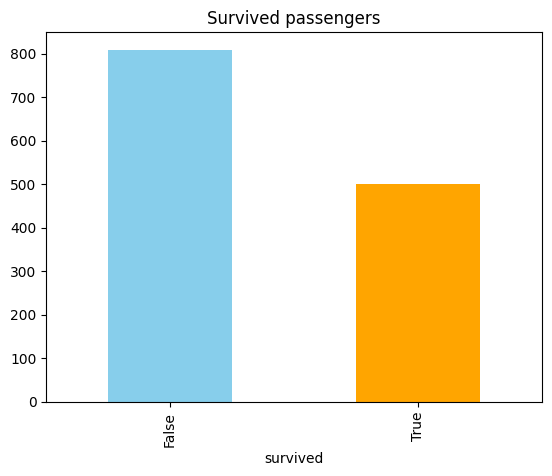

In [74]:
titanic_df["survived"].value_counts().plot(
    kind="bar", color=["skyblue", "orange"], title="Survived passengers"
);

#### Numerical Variables

In [75]:
# list of the numerical columns
numerical_columns = list(titanic_df.select_dtypes(include=["number"]).columns)
numerical_columns

['age', 'sibsp', 'parch', 'fare']

##### Age

In [76]:
column = "age"
titanic_df[column].describe()

count   1046.00
mean      29.88
std       14.41
min        0.17
25%       21.00
50%       28.00
75%       39.00
max       80.00
Name: age, dtype: float64

In [77]:
# number of unique values
titanic_df[column].nunique()

98

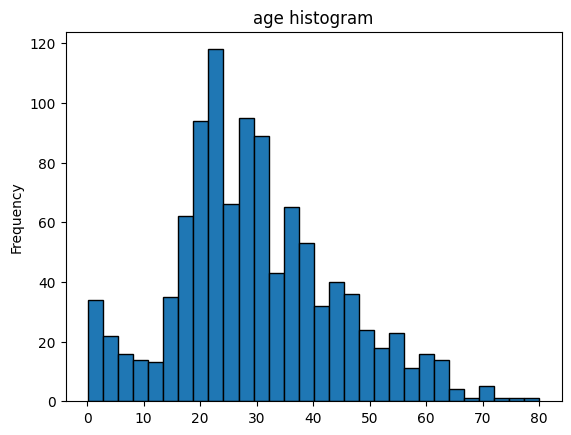

In [78]:
titanic_df[column].plot(
    kind="hist", bins=30, edgecolor="black", title=f"{column} histogram"
);

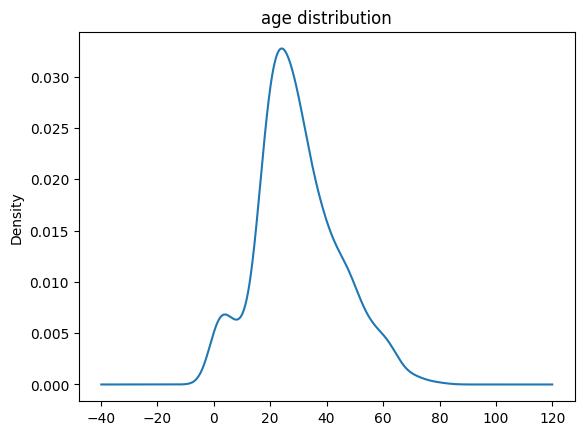

In [79]:
titanic_df[column].plot(kind="density", title=f"{column} distribution");

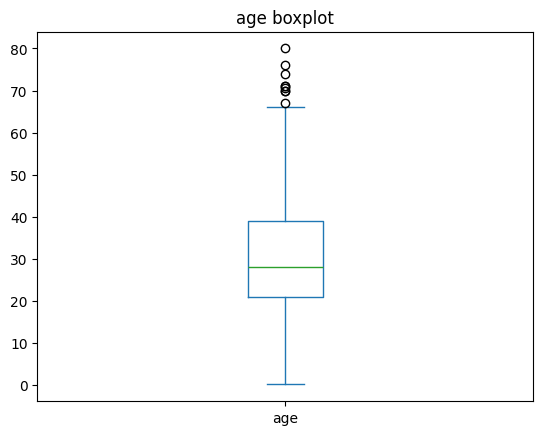

In [80]:
titanic_df[column].plot(kind="box", title=f"{column} boxplot");

##### sibsp

In [81]:
column = "sibsp"
titanic_df[column].describe()

count   1309.00
mean       0.50
std        1.04
min        0.00
25%        0.00
50%        0.00
75%        1.00
max        8.00
Name: sibsp, dtype: float64

In [82]:
# number of unique values
titanic_df[column].nunique()

7

In [83]:
# unique values (because are only a few)
titanic_df[column].unique()

array([0, 1, 2, 3, 4, 5, 8])

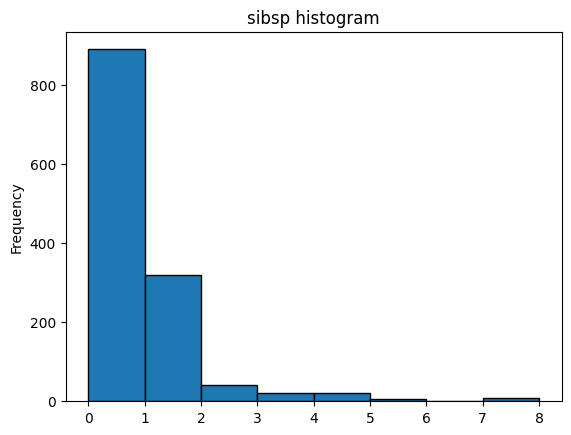

In [84]:
# histogram of a column with 7 unique values between 0 and 8
titanic_df[column].plot(
    kind="hist", bins=8, edgecolor="black", title=f"{column} histogram"
);

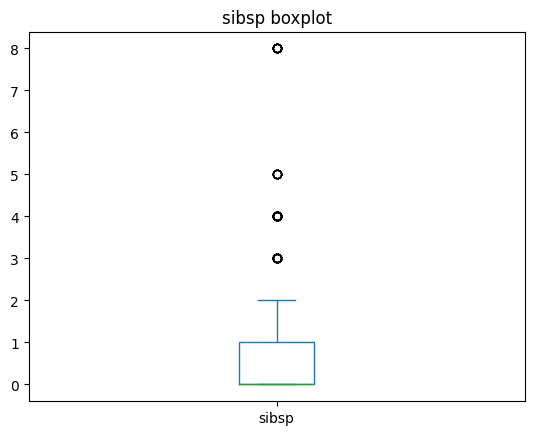

In [85]:
titanic_df[column].plot(kind="box", title=f"{column} boxplot");

##### parch

In [86]:
column = "parch"
titanic_df[column].describe()

count   1309.00
mean       0.39
std        0.87
min        0.00
25%        0.00
50%        0.00
75%        0.00
max        9.00
Name: parch, dtype: float64

In [87]:
# number of unique values

titanic_df[column].nunique()

8

In [88]:
# unique values (because are only a few)
titanic_df[column].unique()

array([0, 2, 1, 4, 3, 5, 6, 9])

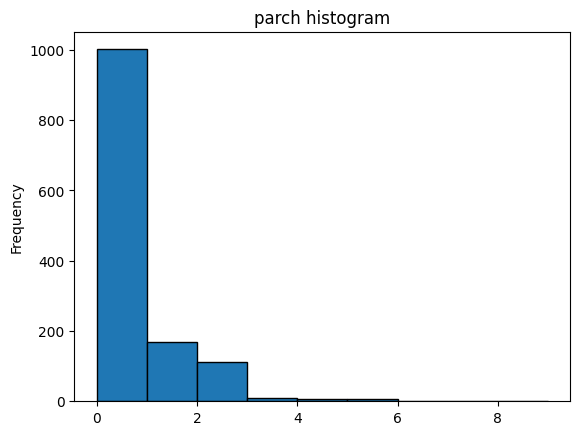

In [89]:
titanic_df[column].plot(
    kind="hist", bins=9, edgecolor="black", title=f"{column} histogram"
);

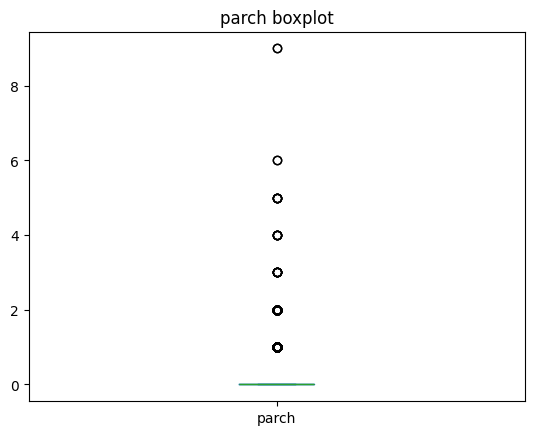

In [90]:
titanic_df[column].plot(kind="box", title=f"{column} boxplot");

##### fare

In [91]:
column = "fare"
titanic_df[column].describe()

count   1308.00
mean      33.30
std       51.76
min        0.00
25%        7.90
50%       14.45
75%       31.27
max      512.33
Name: fare, dtype: float64

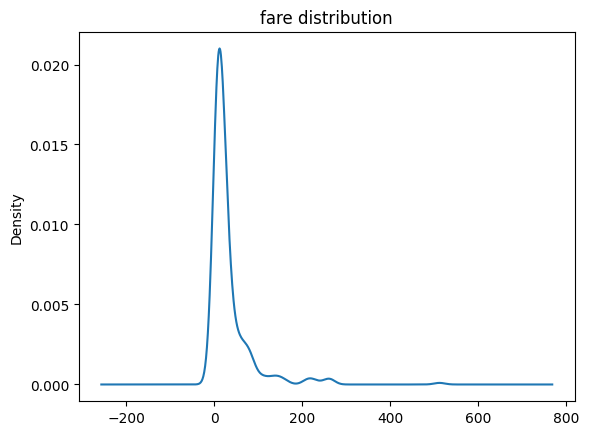

In [92]:
titanic_df[column].plot(kind="kde", title=f"{column} distribution");

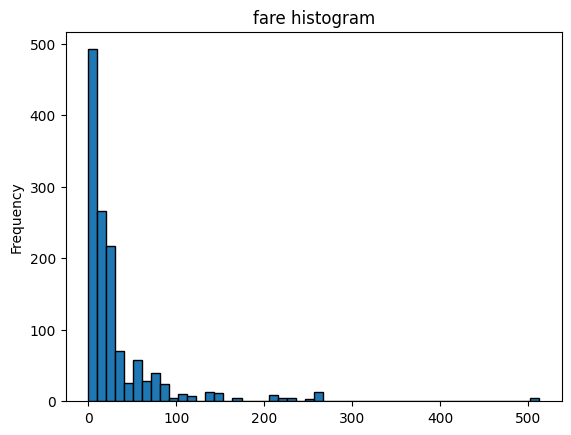

In [93]:
titanic_df[column].plot(
    kind="hist", bins=50, edgecolor="black", title=f"{column} histogram"
);

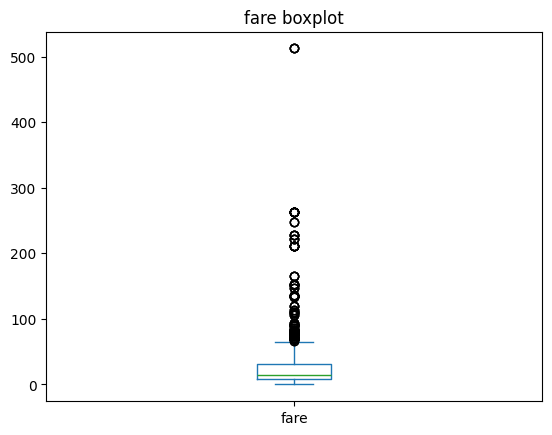

In [94]:
titanic_df[column].plot(kind="box", title=f"{column} boxplot");

#### Categorical Variables

In [95]:
# list of the categorical columns
categorical_columns = list(titanic_df.select_dtypes(include=["category"]).columns)
categorical_columns

['pclass', 'sex', 'embarked']

##### pclass

In [96]:
column = "pclass"
titanic_df[column].describe()

count     1309
unique       3
top          3
freq       709
Name: pclass, dtype: int64

In [97]:
titanic_df[column].unique()

[1, 2, 3]
Categories (3, int64): [3 < 2 < 1]

In [98]:
titanic_df[column].value_counts()

pclass
3    709
1    323
2    277
Name: count, dtype: int64

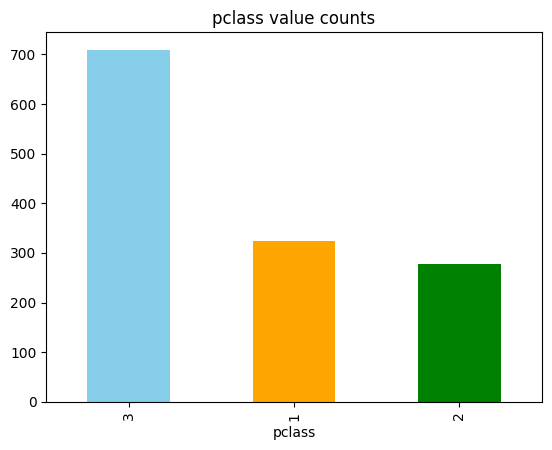

In [99]:
titanic_df[column].value_counts().plot(
    kind="bar", color=["skyblue", "orange", "green"], title=f"{column} value counts"
);

##### Sex

In [100]:
column = "sex"
titanic_df[column].describe()

count     1309
unique       2
top       male
freq       843
Name: sex, dtype: object

In [101]:
titanic_df[column].unique()

['female', 'male']
Categories (2, object): ['female', 'male']

In [102]:
titanic_df[column].value_counts()

sex
male      843
female    466
Name: count, dtype: int64

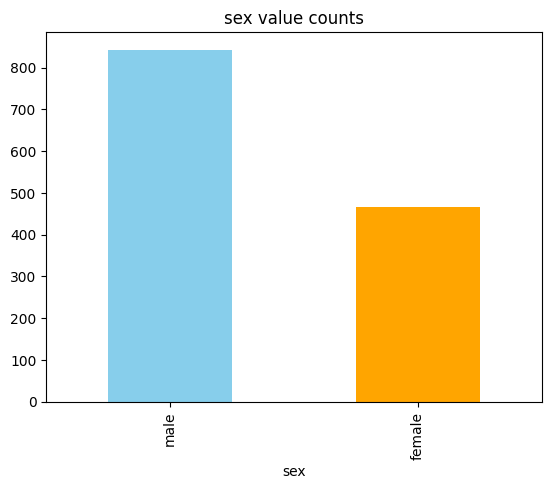

In [103]:
titanic_df[column].value_counts().plot(
    kind="bar", color=["skyblue", "orange"], title=f"{column} value counts"
);

##### embarked

In [104]:
column = "embarked"
titanic_df[column].describe()

count     1307
unique       3
top          S
freq       914
Name: embarked, dtype: object

In [105]:
titanic_df[column].unique()

['S', 'C', NaN, 'Q']
Categories (3, object): ['C', 'Q', 'S']

In [106]:
titanic_df[column].value_counts()

embarked
S    914
C    270
Q    123
Name: count, dtype: int64

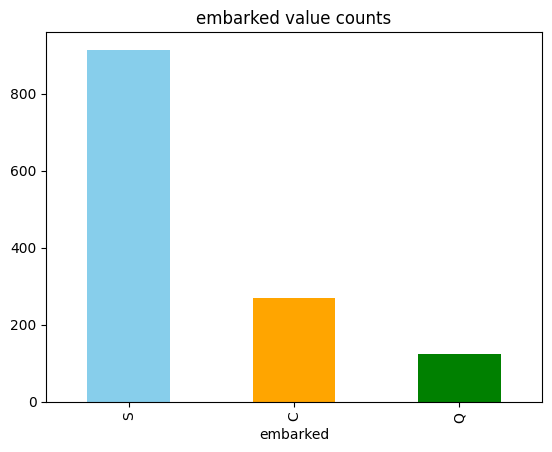

In [107]:
titanic_df[column].value_counts().plot(
    kind="bar", color=["skyblue", "orange", "green"], title=f"{column} value counts"
);

#### String columns

In [108]:
titanic_df["name"].sample(5)

479     Laroche, Miss. Simonne Marie Anne Andree
187                    Lines, Miss. Mary Conover
871                             Horgan, Mr. John
1009                         McMahon, Mr. Martin
686                 Bradley, Miss. Bridget Delia
Name: name, dtype: object

In [109]:
titanic_df["name"].nunique()

1307

### 📈  Bivariate Analysis

Is important to check the relationship between the target variable and the other variables

#### Target vs Numerical Variables

##### survived vs age

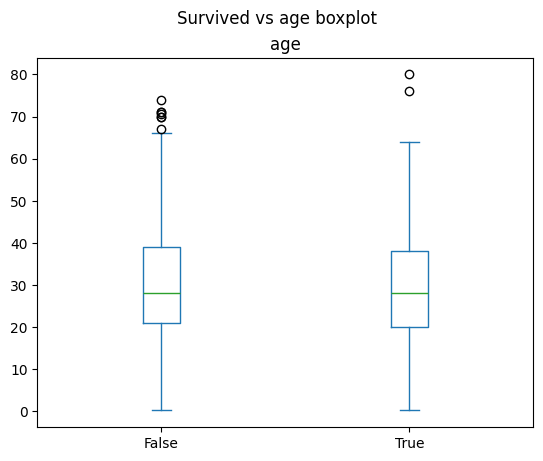

In [110]:
variable = "age"

titanic_df.plot(
    kind="box",
    column=variable,
    by="survived",
    grid=False,
    title=f"Survived vs {variable} boxplot",
);

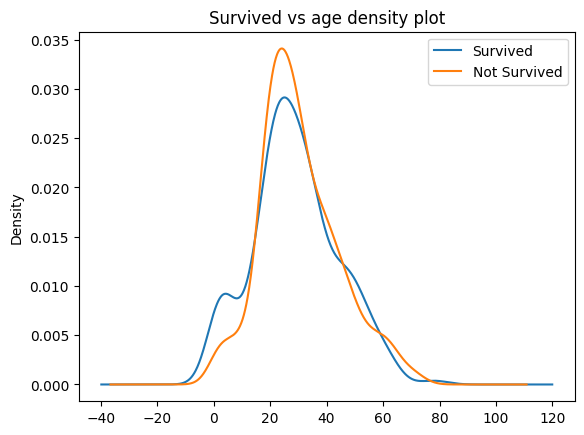

In [111]:
titanic_df[titanic_df["survived"] == 1][variable].plot(
    kind="kde",
    label="Survived",
    legend=True,
    title=f"Survived vs {variable} density plot",
)
titanic_df[titanic_df["survived"] == 0][variable].plot(
    kind="kde",
    label="Not Survived",
    legend=True,
    xlabel=variable,
    ylabel="Density",
);

##### survived vs sibsp

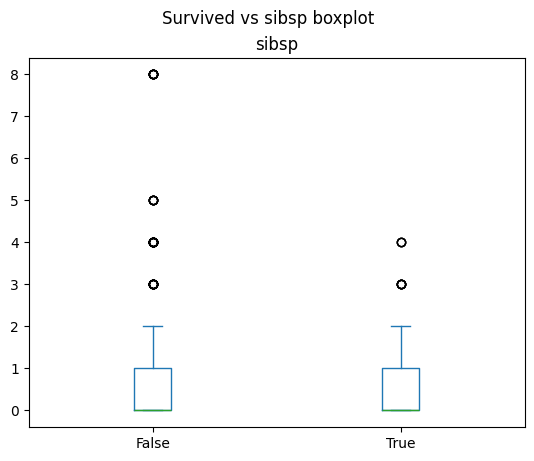

In [112]:
variable = "sibsp"

titanic_df.plot(
    kind="box",
    column=variable,
    by="survived",
    grid=False,
    title=f"Survived vs {variable} boxplot",
);

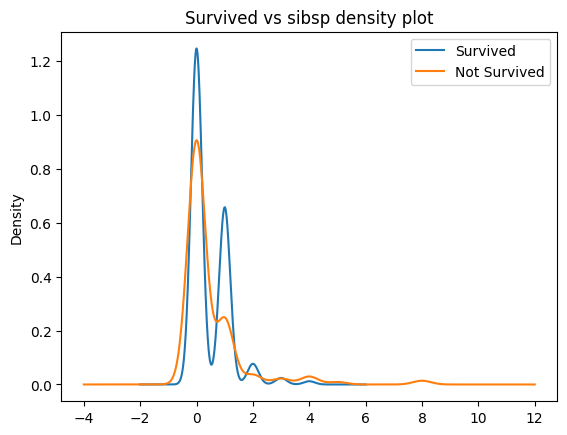

In [113]:
titanic_df[titanic_df["survived"] == 1][variable].plot(
    kind="kde",
    label="Survived",
    legend=True,
    title=f"Survived vs {variable} density plot",
)
titanic_df[titanic_df["survived"] == 0][variable].plot(
    kind="kde",
    label="Not Survived",
    legend=True,
    xlabel=variable,
    ylabel="Density",
);

##### survived vs parch

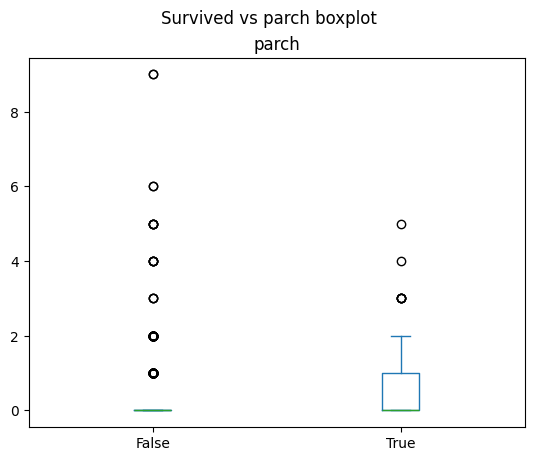

In [114]:
variable = "parch"

titanic_df.plot(
    kind="box",
    column=variable,
    by="survived",
    grid=False,
    title=f"Survived vs {variable} boxplot",
);

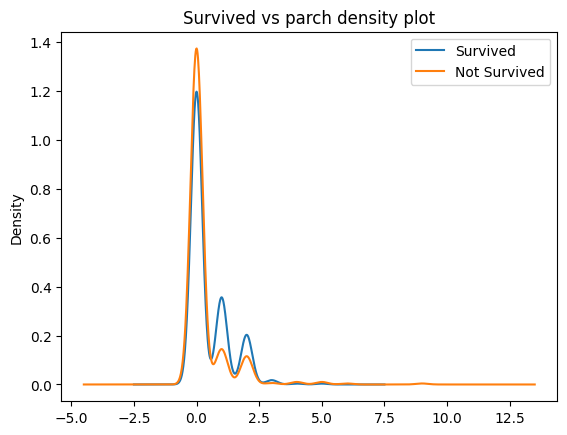

In [115]:
titanic_df[titanic_df["survived"] == 1][variable].plot(
    kind="kde",
    label="Survived",
    legend=True,
    title=f"Survived vs {variable} density plot",
)
titanic_df[titanic_df["survived"] == 0][variable].plot(
    kind="kde",
    label="Not Survived",
    legend=True,
    xlabel=variable,
    ylabel="Density",
);

##### survived vs fare

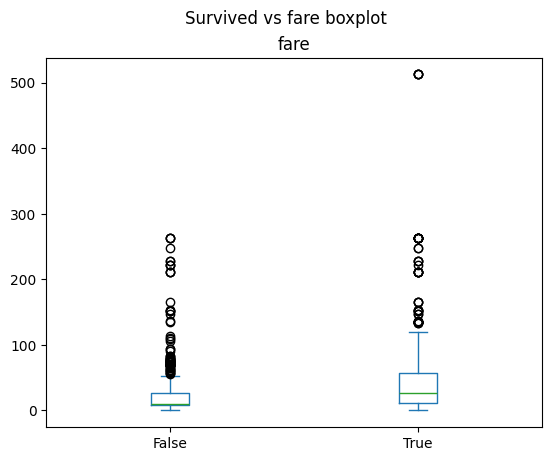

In [116]:
variable = "fare"

titanic_df.plot(
    kind="box",
    column=variable,
    by="survived",
    grid=False,
    title=f"Survived vs {variable} boxplot",
);

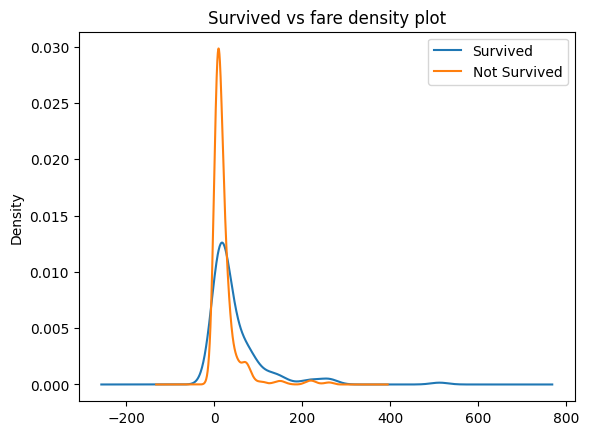

In [117]:
titanic_df[titanic_df["survived"] == 1][variable].plot(
    kind="kde",
    label="Survived",
    legend=True,
    title=f"Survived vs {variable} density plot",
)
titanic_df[titanic_df["survived"] == 0][variable].plot(
    kind="kde",
    label="Not Survived",
    legend=True,
    xlabel=variable,
    ylabel="Density",
);

## 📊 Analysis of Results and Conclusions 



## 💡 Proposals and Ideas




## 📖 References
